In [19]:
import os
import tardis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from astropy import constants as const
from specutils import Spectrum1D
import wsynphot

In [59]:
w, flux, e = np.loadtxt('/home/heringer/Research/routines_11fe-05bl/INPUT_FILES/observational_spectra/2011fe/2011_09_13.dat', unpack=True)

In [6]:
hdf_h = './line_interaction-downbranch_loglum-9.544_velocity_start-7850_time_explosion-19.1/line_interaction-downbranch_loglum-9.544_velocity_start-7850_time_explosion-19.1.hdf'
hdf_l = './line_interaction-downbranch_loglum-9.243_velocity_start-7850_time_explosion-19.1/line_interaction-downbranch_loglum-9.243_velocity_start-7850_time_explosion-19.1.hdf'

In [7]:
print pd.HDFStore(hdf_h)

<class 'pandas.io.pytables.HDFStore'>
File path: ./line_interaction-downbranch_loglum-9.544_velocity_start-7850_time_explosion-19.1/line_interaction-downbranch_loglum-9.544_velocity_start-7850_time_explosion-19.1.hdf
/simulation/model/homologous_density/density_0               series       (shape->[100])      
/simulation/model/homologous_density/scalars                 series       (shape->[1])        
/simulation/model/scalars                                    series       (shape->[1])        
/simulation/model/t_radiative                                series       (shape->[58])       
/simulation/model/v_inner                                    series       (shape->[58])       
/simulation/model/v_outer                                    series       (shape->[58])       
/simulation/model/w                                          series       (shape->[58])       
/simulation/plasma/abundance                                 frame        (shape->[11,58])    
/simulation/plasma/atom

In [8]:
w_l = (const.c.to(u.AA/u.s) / (pd.read_hdf(hdf_l, '/simulation/runner/spectrum_virtual/_frequency').values / u.s)[::-1]).value[1:]
f_l = pd.read_hdf(hdf_l, '/simulation/runner/spectrum_virtual/luminosity').values[::-1]

w_h = (const.c.to(u.AA/u.s) / (pd.read_hdf(hdf_h, '/simulation/runner/spectrum_virtual/_frequency').values / u.s)[::-1]).value[1:]
f_h = pd.read_hdf(hdf_h, '/simulation/runner/spectrum_virtual/luminosity').values[::-1]

rad_h = pd.read_hdf(hdf_h, '/simulation/model/t_radiative')
v_h = pd.read_hdf(hdf_h, '/simulation/model/v_inner') / 1.e5
total_ions_h = sum(pd.read_hdf(hdf_h, '/simulation/plasma/ion_number_density').loc[6])
lvl_h_10 = pd.read_hdf(hdf_h, '/simulation/plasma/level_number_density').loc[6,1,10]
lvl_h_11 = pd.read_hdf(hdf_h, '/simulation/plasma/level_number_density').loc[6,1,11]
abun_h = pd.read_hdf(hdf_h, '/simulation/plasma/abundance').loc[6]

rad_l = pd.read_hdf(hdf_l, '/simulation/model/t_radiative')
v_l = pd.read_hdf(hdf_l, '/simulation/model/v_inner') / 1.e5
total_ions_l = sum(pd.read_hdf(hdf_l, '/simulation/plasma/ion_number_density').loc[6])
lvl_l_10 = pd.read_hdf(hdf_l, '/simulation/plasma/level_number_density').loc[6,1,10]
lvl_l_11 = pd.read_hdf(hdf_l, '/simulation/plasma/level_number_density').loc[6,1,11]
abun_l = pd.read_hdf(hdf_l, '/simulation/plasma/abundance').loc[6]


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


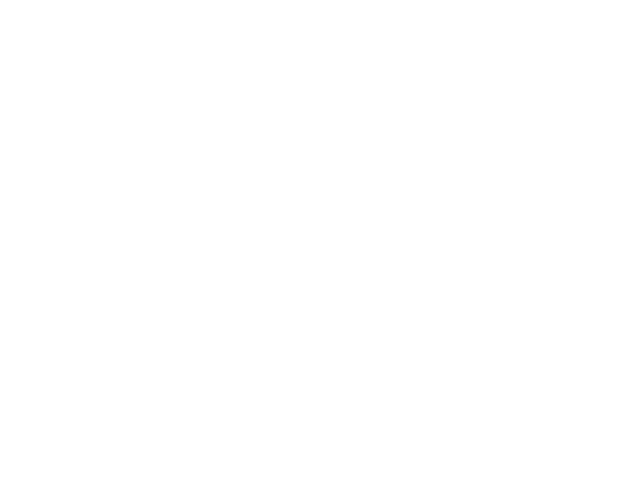

In [9]:
%pylab notebook

plot(w_h, f_h, color='b', label='L_11fe')
plot(w_l, f_l, color='r', label='L_11fe/2')
legend()

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


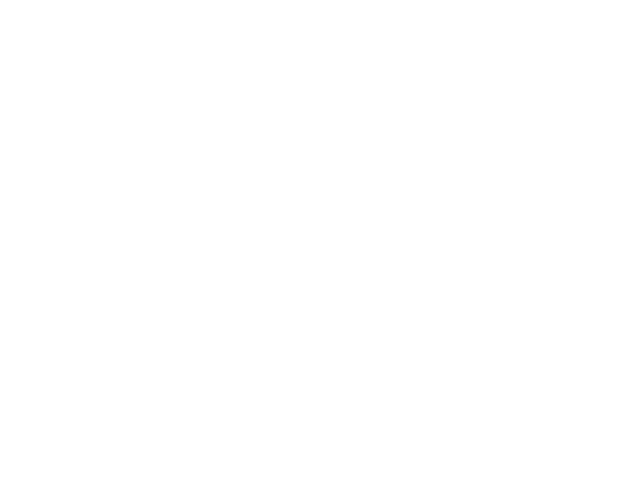

In [10]:
%pylab notebook

plot(v_h, rad_h, color='b', ls='-', label='L_11fe, level=10')
plot(v_l, rad_l, color='r', ls='-', label='L_11fe/2, level=10')
legend()



Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


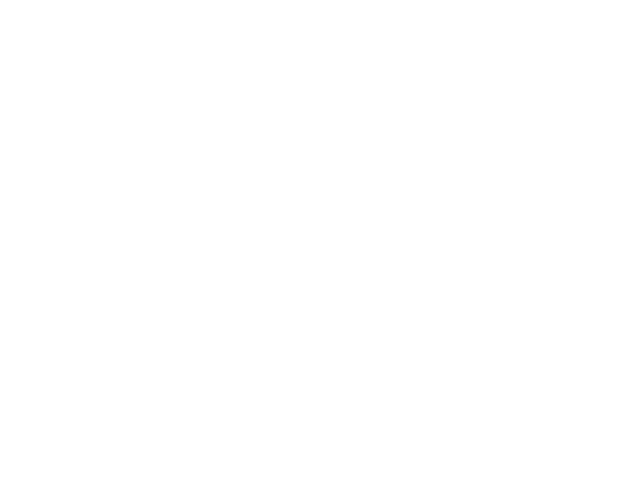

In [11]:
%pylab notebook

plot(v_h, abun_h, color='b', ls='-', label='L_11fe, C_abun')
plot(v_l, abun_l, color='r', ls='-', label='L_11fe/2, C_abun')
xlabel('v [km/s]')
semilogy()
legend(loc=2)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


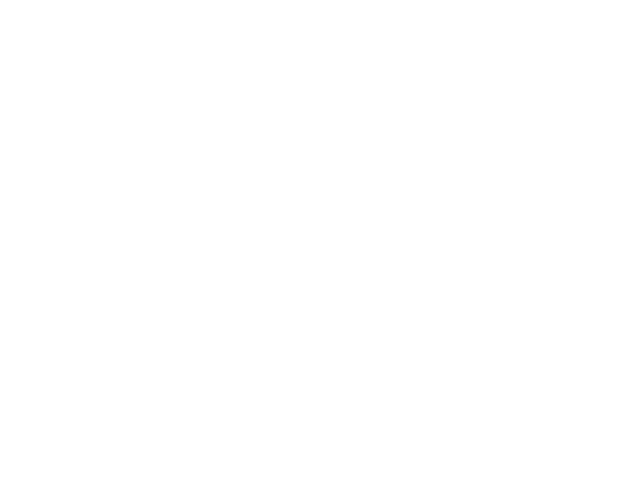

In [12]:
%pylab notebook

plot(rad_h, lvl_h_10, color='b', ls='-', label='L_11fe, level=10')
plot(rad_h, lvl_h_11, color='b', ls='--', label='L_11fe, level=11')

plot(rad_l, lvl_l_10, color='r', ls='-', label='L_11fe/2, level=10')
plot(rad_l, lvl_l_11, color='r', ls='--', label='L_11fe/2, level=11')

xlabel('T [K]')
semilogy()
legend(loc=4)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


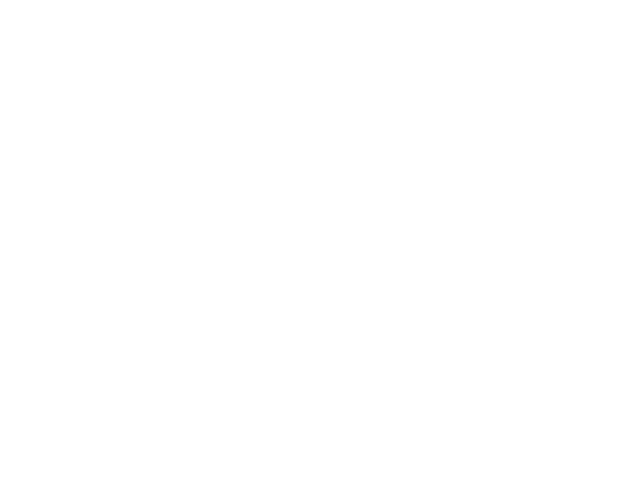

In [13]:
%pylab notebook

plot(v_h, lvl_h_10, color='b', ls='-', label='L_11fe, level=10')
plot(v_h, lvl_h_11, color='b', ls='--', label='L_11fe, level=11')

plot(v_l, lvl_l_10, color='r', ls='-', label='L_11fe/2, level=10')
plot(v_l, lvl_l_11, color='r', ls='--', label='L_11fe/2, level=11')

xlabel('v [km/s]')
semilogy()
legend(loc=3)

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


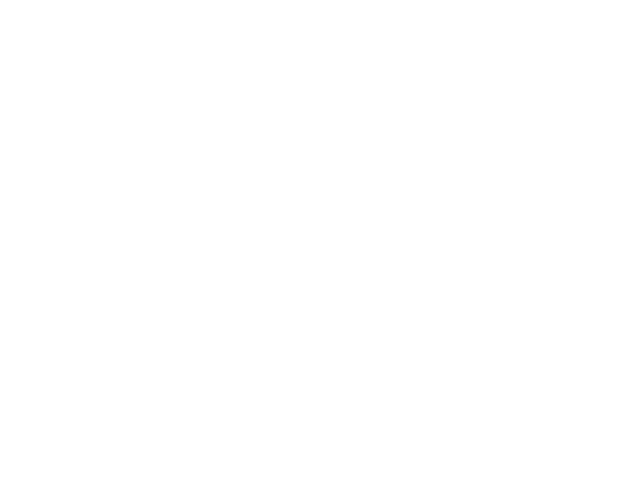

In [14]:
%pylab notebook

plot(rad_h, lvl_h_10 / total_ions_h, color='b', ls='-', label='L_11fe, level=10')
plot(rad_h, lvl_h_11 / total_ions_h, color='b', ls='--', label='L_11fe, level=11')

plot(rad_l, lvl_l_10 / total_ions_l, color='r', ls='-', label='L_11fe/2, level=10')
plot(rad_l, lvl_l_11 / total_ions_l, color='r', ls='--', label='L_11fe/2, level=11')

xlabel('T [K]')
semilogy()
legend(loc=4)



Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


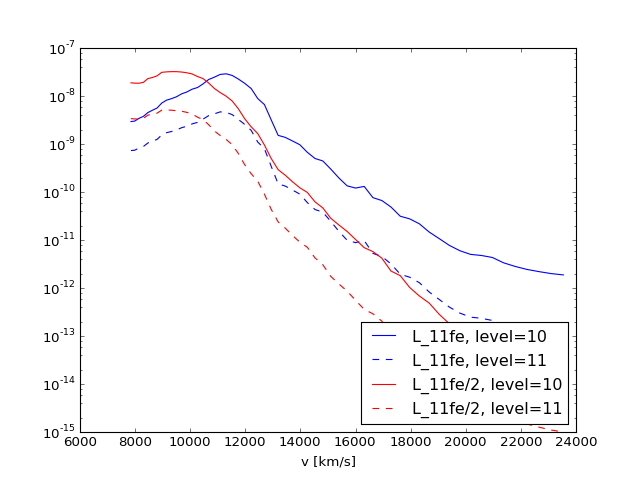

In [15]:
%pylab notebook

plot(v_h, lvl_h_10 / total_ions_h, color='b', ls='-', label='L_11fe, level=10')
plot(v_h, lvl_h_11 / total_ions_h, color='b', ls='--', label='L_11fe, level=11')

plot(v_l, lvl_l_10 / total_ions_l, color='r', ls='-', label='L_11fe/2, level=10')
plot(v_l, lvl_l_11 / total_ions_l, color='r', ls='--', label='L_11fe/2, level=11')

xlabel('v [km/s]')
semilogy()
legend(loc=4)


Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


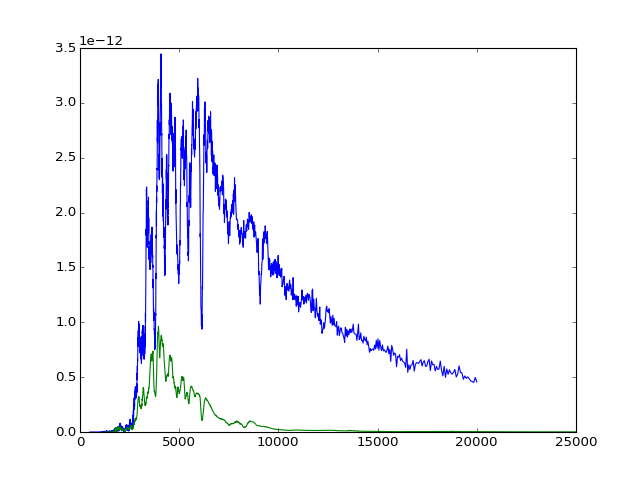

In [63]:
%pylab notebook
plot(w_h, f_h2.to(u.erg/u.s/u.cm**2/u.Angstrom))
plot(w, flux)

In [55]:
x = wsynphot.FilterCurve.load_filter('/bessell/v')
f_h2 = (f_h * u.erg / u.s /u.AA / (4. * np.pi * 6.4 ** 2. * u.Mpc ** 2.)).to(u.erg/u.s/u.cm**2/u.Angstrom)
y = Spectrum1D.from_array(w_h * u.AA, f_h2)
y_obs = Spectrum1D.from_array(w * u.AA, f * u.erg / u.s / u.cm**2 / u.AA)

In [57]:
x.calculate_vega_magnitude(y_obs)

<Quantity 9.98151992785081>

In [30]:
f_h2

<Quantity [  1.35273049e-08,  4.85804299e-09,  1.26375526e-08,...,
             7.05225518e+36,  7.75893786e+36,  7.10298574e+36] erg / (Angstrom Mpc2 s)>